# Lectura y graficación de una señal almacenada en un archivo txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Abrimos el archivo txt para ver  el contenido

In [2]:
f = open("resolviendo.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data

'# OpenSignals Text File Format. Version 1\n# {"98:D3:71:FD:62:1E": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:71:FD:62:1E", "device connection": "BTH98:D3:71:FD:62:1E", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2023-4-19", "time": "12:1:14.555", "channels": [4], "sensor": ["EEGBITREV"], "label": ["A4"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A4"], "special": [{}], "digital IO": [0, 0, 1, 1]}}\n# EndOfHeader\n0\t0\t0\t0\t0\t698\t\n1\t0\t0\t0\t0\t723\t\n2\t0\t0\t0\t0\t738\t\n3\t0\t0\t0\t0\t740\t\n4\t0\t0\t0\t0\t732\t\n5\t0\t0\t0\t0\t716\t\n6\t0\t0\t0\t0\t693\t\n7\t0\t0\t0\t0\t662\t\n8\t0\t0\t0\t0\t627\t\n9\t0\t0\t0\t0\t579\t\n10\t0\t0\t0\t0\t539\t\n11\t0\t0\t0\t0\t520\t\n12\t0\t0\t0\t0\t514\t\n13\t0\t0\t0\t0\t520\t\n14\t0\t0\t0\t0\t534\t\n15\t0\t0\t0\t0\t556\t\n0\t0\t0\t0\t0\t579\t\n1\t0\t0\t0\t0\t603\t\n2\t0\t0\t0\t0\t626\t\n3\t0\t0\t0\t0\t636\t\n4

In [3]:
## Expresion regular para buscar automaticamente el contenido de un numero dentro de un string
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)


['100', '128', '202', '555', '579', '539', '520', '514', '520', '534', '556', '579', '599', '564', '521', '482', '458', '450', '460', '489', '528', '575', '575', '546', '534', '532', '545', '571', '574', '534', '496', '472', '464', '467', '479', '504', '526', '543', '558', '583', '581', '542', '497', '459', '432', '421', '415', '414', '443', '474', '505', '527', '533', '527', '515', '500', '482', '458', '431', '401', '378', '375', '388', '416', '448', '485', '522', '558', '591', '579', '528', '472', '423', '388', '373', '379', '401', '430', '460', '487', '509', '522', '526', '523', '513', '498', '476', '444', '409', '382', '365', '366', '385', '417', '449', '477', '505', '525', '539', '543', '540', '521', '493', '458', '422', '387', '356', '335', '328', '335', '354', '380', '412', '448', '480', '497', '506', '507', '496', '476', '444', '406', '371', '356', '358', '370', '386', '410', '439', '468', '489', '507', '522', '532', '529', '513', '485', '440', '390', '342', '311', '300', '307'

In [4]:
Fs = 1000
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000 hz
 Ts=0.001 s


## Leemos el archivo excluyendo las 2 primeras filas del archivo

In [5]:
array = np.genfromtxt("resolviendo.txt", delimiter="\t",skip_header = 3)
array

array([[  0.,   0.,   0., ...,   0., 698.,  nan],
       [  1.,   0.,   0., ...,   0., 723.,  nan],
       [  2.,   0.,   0., ...,   0., 738.,  nan],
       ...,
       [  1.,   0.,   0., ...,   0., 455.,  nan],
       [  2.,   0.,   0., ...,   0., 474.,  nan],
       [  3.,   0.,   0., ...,   0., 486.,  nan]])

## Ploteamos la lectura

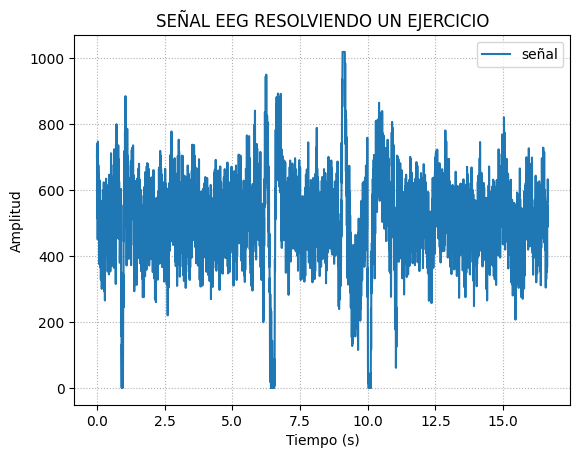

In [6]:
arr = []
for i in range(int(len(array[:,-2])/2) ):
    arr.append(i/Fs)
               
plt.plot(arr , array[:int(len(array[:,-2]) /2),-2], label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.title("SEÑAL EEG RESOLVIENDO UN EJERCICIO")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.show()


## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

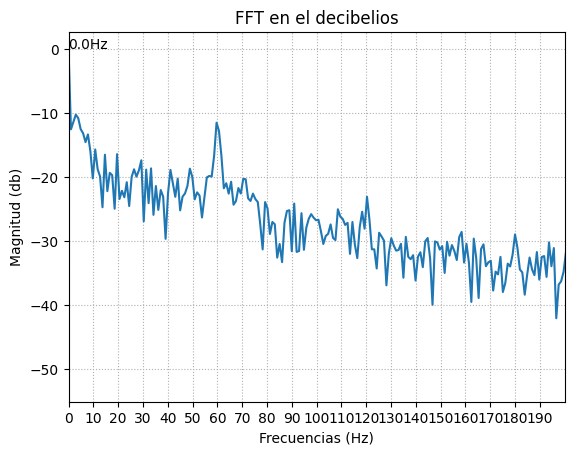

In [7]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array[:,-2]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()